In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
# Configurar gráficos dentro del notebook
%matplotlib inline

In [51]:
# Carga los datos, probando diferentes codificaciones
try:
    data = pd.read_csv('Precipitaciondt.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('Precipitaciondt.csv', encoding='latin-1')
    except UnicodeDecodeError:
        print("Error: No se pudo decodificar el archivo. Verifica la codificación.")
        exit()

In [52]:
# Vista general
print(data.head())  # Primeras filas
print(data.info())  # Información de las columnas y tipos de datos
print(data.describe())  # Estadísticas descriptivas

        ESTACIÓN   CÓDIGO     X=N     Y=E MUNICIPIO     CUENCA   AÑO  ENERO  \
0  Pajas Blancas  2119022  973320  944710      Nilo  R. Paguey  1995    0.0   
1  Pajas Blancas  2119022  973320  944710      Nilo  R. Paguey  1996  295.9   
2  Pajas Blancas  2119022  973320  944710      Nilo  R. Paguey  1997  294.2   
3  Pajas Blancas  2119022  973320  944710      Nilo  R. Paguey  1998  144.3   
4  Pajas Blancas  2119022  973320  944710      Nilo  R. Paguey  1999   78.3   

   FEBRERO  MARZO  ABRIL   MAYO  JUNIO  JULIO  AGOSTO  SEPTIEMBRE  OCTUBRE  \
0      0.0    0.0    0.0    0.0    0.0    0.0     0.0        31.5    190.0   
1    127.2  247.5  149.2    0.0    0.0    0.0     0.0         0.0      0.0   
2     76.9  160.2  296.3  144.1  134.3   20.1     3.6        75.3    174.0   
3    118.0  209.1  438.3  292.6   30.6   35.2    30.7       103.2    385.9   
4    256.6   83.0  339.3  108.2  236.2   17.6    23.7       322.9    337.9   

   NOVIEMBRE  DICIEMBRE  
0      153.6       76.2  
1   

In [53]:
# Ver valores nulos en el DataFrame
print(data.isnull().sum())

# Porcentaje de valores faltantes por columna
missing_percent = data.isnull().mean() * 100
print(missing_percent)

ESTACIÓN      0
CÓDIGO        0
X=N           0
Y=E           0
MUNICIPIO     0
CUENCA        0
AÑO           0
ENERO         0
FEBRERO       0
MARZO         0
ABRIL         0
MAYO          0
JUNIO         1
JULIO         0
AGOSTO        0
SEPTIEMBRE    0
OCTUBRE       0
NOVIEMBRE     0
DICIEMBRE     0
dtype: int64
ESTACIÓN      0.000000
CÓDIGO        0.000000
X=N           0.000000
Y=E           0.000000
MUNICIPIO     0.000000
CUENCA        0.000000
AÑO           0.000000
ENERO         0.000000
FEBRERO       0.000000
MARZO         0.000000
ABRIL         0.000000
MAYO          0.000000
JUNIO         0.016139
JULIO         0.000000
AGOSTO        0.000000
SEPTIEMBRE    0.000000
OCTUBRE       0.000000
NOVIEMBRE     0.000000
DICIEMBRE     0.000000
dtype: float64


In [54]:
# Imputar valores nulos en JUNIO con la media de la columna
data['JUNIO'] = data['JUNIO'].fillna(data['JUNIO'].mean())

# Verificar que no haya nulos en JUNIO
print("\nValores nulos en JUNIO después de la imputación:", data['JUNIO'].isnull().sum())


Valores nulos en JUNIO después de la imputación: 0


In [55]:
# Imputar valores nulos en una columna categórica con el valor más frecuente
data['CUENCA'] = data['CUENCA'].fillna(data['CUENCA'].mode()[0])

# Verificar nulos
print("\nValores nulos en CUENCA después de la imputación:", data['CUENCA'].isnull().sum())



Valores nulos en CUENCA después de la imputación: 0


In [56]:
# Guardar el DataFrame limpio
data.to_csv("Precipitaciondt_limpio.csv", index=False)
print("\nEl archivo limpio ha sido guardado como 'Precipitaciondt_limpio.csv'")


El archivo limpio ha sido guardado como 'Precipitaciondt_limpio.csv'


In [57]:
print(data.dtypes)


ESTACIÓN       object
CÓDIGO          int64
X=N             int64
Y=E             int64
MUNICIPIO      object
CUENCA         object
AÑO             int64
ENERO         float64
FEBRERO       float64
MARZO         float64
ABRIL         float64
MAYO          float64
JUNIO         float64
JULIO         float64
AGOSTO        float64
SEPTIEMBRE    float64
OCTUBRE       float64
NOVIEMBRE     float64
DICIEMBRE     float64
dtype: object


Esto mostrará todos los valores únicos en la columna, incluyendo posibles problemas como espacios, valores vacíos, o errores tipográficos.


In [58]:
#Ver los valores únicos en la columna CUENCA
print(data['CUENCA'].unique())


['R. Paguey' 'R. Negro' 'Lag. Fúquene' 'R. Sutamarchán' 'Emb. Neusa'
 'R. Suárez' 'Emb- Tominé' 'Emb. Muña' 'R. Frío' 'R. Lenguazaque'
 'R. Tunjuelo' 'R. Soacha' 'R. Cuja' 'R. Ubaté' 'Emb. Tominé'
 'R. Subachoque' 'Rionegro' 'R. Magddalena' 'R. Suta' 'R. El Hato'
 'R. Blanco' 'R. Bogotá' 'R. Checua' 'Lag. Tota' 'R. Bojacá' 'R. Apulo'
 'R. Teusacá' 'R. Calandaima' 'R. Balsillas' 'R. Tobia' 'R. Susa'
 'Emb. Sisga' 'Bogotá' 'R. Basillas' 'R. Neusa' 'R. Aves' 'R. Subia'
 'R. Nevado' 'R. Chicú' 'R. Minero' 'R. Simijaca' 'R. Curí' 'R. Batán'
 'Lag. Suesca' 'R. San Juan' 'R. Sumapaz' 'R. Teatinos' 'R. Une'
 'R. Chiquinquirá']


In [59]:
#Limpiar la columna 
# Quitar espacios al inicio y al final de cada valor
data['CUENCA'] = data['CUENCA'].str.strip()

# Convertir todos los valores a minúsculas o mayúsculas para estandarizar
data['CUENCA'] = data['CUENCA'].str.lower()  # o .str.upper()

Asegúrate de que no haya valores nulos en la columna CUENCA

In [60]:
# Reemplazar valores nulos con un texto como "desconocido" o eliminarlos
data['CUENCA'] = data['CUENCA'].fillna('desconocido')

# O eliminar las filas con valores nulos en CUENCA
# data = data.dropna(subset=['CUENCA'])


In [61]:
# Seleccionar columnas no numéricas
non_numeric_columns = data.select_dtypes(exclude='number')
print(non_numeric_columns.columns)


Index(['ESTACIÓN', 'MUNICIPIO', 'CUENCA'], dtype='object')


In [62]:
# Seleccionar columnas numéricas
numeric_data = data.select_dtypes(include='number')

# Agregar la columna CUENCA para agrupar
numeric_data['CUENCA'] = data['CUENCA']


In [63]:
# Convertir columnas categóricas a variables dummy (One-Hot Encoding) o numericas
data = pd.get_dummies(data, columns=['ESTACIÓN', 'MUNICIPIO', 'CUENCA'])


In [64]:
# Ver las primeras filas de los datos después de la conversión
print(data.head())


    CÓDIGO     X=N     Y=E   AÑO  ENERO  FEBRERO  MARZO  ABRIL   MAYO  JUNIO  \
0  2119022  973320  944710  1995    0.0      0.0    0.0    0.0    0.0    0.0   
1  2119022  973320  944710  1996  295.9    127.2  247.5  149.2    0.0    0.0   
2  2119022  973320  944710  1997  294.2     76.9  160.2  296.3  144.1  134.3   
3  2119022  973320  944710  1998  144.3    118.0  209.1  438.3  292.6   30.6   
4  2119022  973320  944710  1999   78.3    256.6   83.0  339.3  108.2  236.2   

   ...  CUENCA_r. suta  CUENCA_r. sutamarchán  CUENCA_r. suárez  \
0  ...           False                  False             False   
1  ...           False                  False             False   
2  ...           False                  False             False   
3  ...           False                  False             False   
4  ...           False                  False             False   

   CUENCA_r. teatinos  CUENCA_r. teusacá  CUENCA_r. tobia  CUENCA_r. tunjuelo  \
0               False              

In [65]:
print(data.columns)

Index(['CÓDIGO', 'X=N', 'Y=E', 'AÑO', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL',
       'MAYO', 'JUNIO',
       ...
       'CUENCA_r. suta', 'CUENCA_r. sutamarchán', 'CUENCA_r. suárez',
       'CUENCA_r. teatinos', 'CUENCA_r. teusacá', 'CUENCA_r. tobia',
       'CUENCA_r. tunjuelo', 'CUENCA_r. ubaté', 'CUENCA_r. une',
       'CUENCA_rionegro'],
      dtype='object', length=314)


Agrupar los datos de precipitaciones por cuenca
Explicación:
precipitation_columns: Esta lista contiene los nombres de las columnas de precipitaciones, que son las que contienen los datos de lluvia para cada mes.

cuenca_columns: Aquí seleccionamos las columnas generadas por One-Hot Encoding que contienen las cuencas. Estas columnas tienen el prefijo CUENCA_r..

groupby(cuenca_columns): Agrupa los datos según las cuencas. Como las columnas de cuenca tienen valores True o False (o 1 y 0), se puede agrupar fácilmente por estas columnas.

mean(): Calcula la media de las precipitaciones para cada grupo de cuenca.

In [66]:
# Definir las columnas de precipitaciones
precipitation_columns = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Seleccionar las columnas de cuenca (aquellas que contienen 'CUENCA_r.')
cuenca_columns = [col for col in data.columns if 'CUENCA_r.' in col]

# Agrupar por las columnas de cuenca y calcular la media de las precipitaciones
precipitation_by_cuenca = data[cuenca_columns + precipitation_columns].groupby(cuenca_columns).mean()

# Mostrar el resultado
print(precipitation_by_cuenca)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ENERO  \
CUENCA_r. apulo CUENCA_r. aves CUENCA_r. balsillas CUENCA_r. basillas CUENCA_r. batán CUENCA_r. blanco CUENCA_r. bogotá CUENCA_r. bojacá CUENCA_r. calandaima CUENCA_r. checua CUENCA_r. chicú CUENCA_r. chiquinquirá CUENCA_r. cuja CUENCA_r. curí CUENCA_r. el hato CUENCA_r. frío CUENCA_r. lenguazaque CU

Análisis e interpretación:
Filas con combinaciones booleanas: Cada fila parece representar una combinación única de valores booleanos para las columnas de cuencas (True o False). Esto indica si una cuenca está activa para una determinada fila.

Columna de valores numéricos (precipitación): La última columna contiene los valores medios de precipitaciones asociadas a la combinación de cuencas activas.

Qué hacer a continuación
Filtrar las filas relevantes: Dado que tienemos varias combinaciones, probablemente solo necesitemos las filas donde una sola cuenca tiene el valor True. Esto simplifica el análisis y asocia directamente cada cuenca con su promedio de precipitaciones.

In [67]:
# Filtrar filas donde exactamente una cuenca está activa (True)
filtered_data = data[(data[cuenca_columns].sum(axis=1) == 1)]


Renombrar las cuencas activas: Una vez filtradas, podrías crear una nueva columna que identifique directamente la cuenca activa para esa fila:

In [68]:
# Crear una columna con el nombre de la cuenca activa
filtered_data['CUENCA_ACTIVA'] = filtered_data[cuenca_columns].idxmax(axis=1)


C:\Users\Osdag\AppData\Local\Temp\ipykernel_7956\4064541689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CUENCA_ACTIVA'] = filtered_data[cuenca_columns].idxmax(axis=1)


Organizar datos para presentación: Ahora puedes agrupar por la nueva columna CUENCA_ACTIVA para obtener las precipitaciones medias para cada cuenca:

In [69]:
# Agrupar por la cuenca activa y calcular la media
resumen_cuencas = filtered_data.groupby('CUENCA_ACTIVA')[precipitation_columns].mean()
print(resumen_cuencas)


                             ENERO     FEBRERO       MARZO       ABRIL  \
CUENCA_ACTIVA                                                            
CUENCA_r. apulo          79.168103   94.681897  130.259483  141.758621   
CUENCA_r. aves           26.261667   32.625000   50.538333   59.850000   
CUENCA_r. balsillas      67.566667   28.266667   27.633333   92.266667   
CUENCA_r. basillas        1.416667   14.333333   32.666667   63.300000   
CUENCA_r. batán          51.361905   83.557143  110.233333  128.095238   
CUENCA_r. blanco         76.810000   69.400000  117.390000  212.580000   
CUENCA_r. bogotá         49.138480   60.179810   81.531591  109.364846   
CUENCA_r. bojacá         35.154747   47.250949   71.662658   94.169304   
CUENCA_r. calandaima     86.622222  105.978788  162.034343  162.083838   
CUENCA_r. checua         22.510561   34.664686   63.166337   82.558746   
CUENCA_r. chicú          26.790291   42.912621   60.503883   95.447573   
CUENCA_r. chiquinquirá   29.266667   4

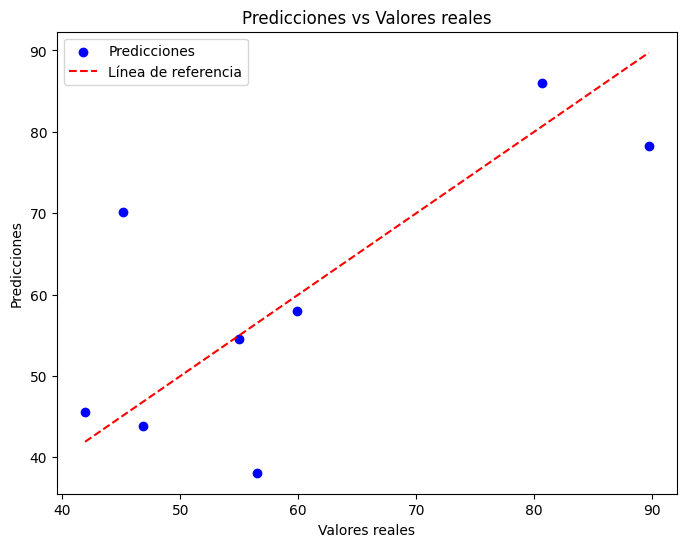

In [70]:
# Generar un conjunto de datos 
X = resumen_cuencas.iloc[:, :-1]  # Características: de ENERO a NOVIEMBRE (todas las columnas excepto DICIEMBRE)
y = resumen_cuencas['DICIEMBRE']  # Objetivo: DICIEMBRE
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo (por ejemplo, regresión lineal)
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
predictions = model.predict(X_test)

# Graficar Predicciones vs Valores Reales con una línea de referencia
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.legend()
plt.show()


In [71]:
print(data.head())

    CÓDIGO     X=N     Y=E   AÑO  ENERO  FEBRERO  MARZO  ABRIL   MAYO  JUNIO  \
0  2119022  973320  944710  1995    0.0      0.0    0.0    0.0    0.0    0.0   
1  2119022  973320  944710  1996  295.9    127.2  247.5  149.2    0.0    0.0   
2  2119022  973320  944710  1997  294.2     76.9  160.2  296.3  144.1  134.3   
3  2119022  973320  944710  1998  144.3    118.0  209.1  438.3  292.6   30.6   
4  2119022  973320  944710  1999   78.3    256.6   83.0  339.3  108.2  236.2   

   ...  CUENCA_r. suta  CUENCA_r. sutamarchán  CUENCA_r. suárez  \
0  ...           False                  False             False   
1  ...           False                  False             False   
2  ...           False                  False             False   
3  ...           False                  False             False   
4  ...           False                  False             False   

   CUENCA_r. teatinos  CUENCA_r. teusacá  CUENCA_r. tobia  CUENCA_r. tunjuelo  \
0               False              

In [72]:
# Preparar X (meses ENERO a NOVIEMBRE) y Y (DICIEMBRE como objetivo)
precipitation_columns = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
                         'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

In [73]:
# Asegurarnos de que todas las columnas están presentes
resumen_cuencas = resumen_cuencas[precipitation_columns]

In [74]:
# Características y objetivo
X = resumen_cuencas.iloc[:, :-1]  # De ENERO a NOVIEMBRE
Y = resumen_cuencas['DICIEMBRE']

In [75]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Pasos para ajustar los hiperparámetros
Utilizando herramientas como GridSearchCV o RandomizedSearchCV de sklearn, puedes ajustar los hiperparámetros.

In [76]:
# Definir el modelo base
base_model = RandomForestRegressor(random_state=42)


In [77]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],       # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],     # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],     # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],       # Mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt'],    # Máximo de características consideradas para dividir
}

In [78]:
# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [79]:

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [80]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")


Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [81]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
rmse = mean_squared_error(Y_test, predictions, squared=False)
print(f"RMSE con los mejores hiperparámetros: {rmse}")

RMSE con los mejores hiperparámetros: 7.527642728567416


c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [83]:
# Realizar predicciones
predictions = model.predict(X_test)

In [84]:
# Evaluar el modelo
rmse = mean_squared_error(Y_test, predictions, squared=False)
print(f"RMSE del modelo: {rmse}")

RMSE del modelo: 7.699887242393562


c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
# Comparar predicciones con valores reales
comparison = pd.DataFrame({'Real': Y_test, 'Predicción': predictions})
print(comparison.head())

                         Real  Predicción
CUENCA_ACTIVA                            
CUENCA_r. teatinos  56.466667   52.408281
CUENCA_r. tunjuelo  46.844937   47.884144
CUENCA_r. batán     80.671429   79.069526
CUENCA_r. curí      89.725806   77.649112
CUENCA_r. suta      41.916194   44.196502


 predecir la precipitación de diciembre para una cuenca específica o promedio:

In [86]:
# Crear un nuevo dato de entrada (modificar con datos reales)
nuevo_dato = np.array([[79.16, 94.68, 130.25, 141.75, 128.13, 59.98, 41.65, 52.91, 79.96, 154.06, 110.23]])
prediccion_diciembre = model.predict(nuevo_dato)
print(f"Predicción de diciembre: {prediccion_diciembre[0]}")


Predicción de diciembre: 85.15895533494555


c:\Users\Osdag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [87]:
# Calcular el coeficiente de determinación
r2_score = model.score(X_test, Y_test)
print(f"R² del modelo: {r2_score}")


R² del modelo: 0.7704395967426014


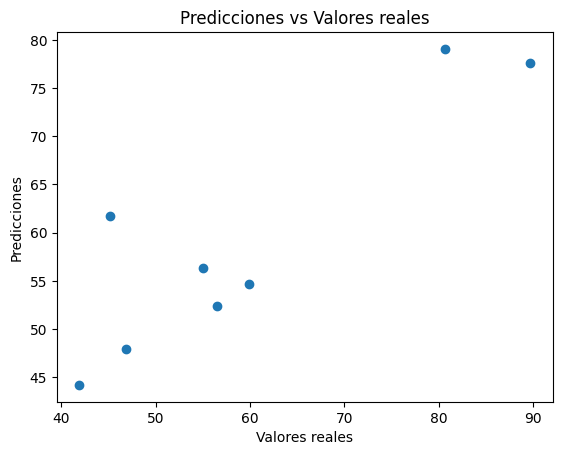

In [88]:
plt.scatter(Y_test, predictions)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()


In [89]:
import joblib
joblib.dump(model, "modelo_precipitaciones.pkl")


['modelo_precipitaciones.pkl']

In [90]:
modelo_cargado = joblib.load("modelo_precipitaciones.pkl")
